### Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [57]:
import numpy as no
import pandas as pd

UEFA = pd.read_csv('Lligues europees UEFA.csv', sep=';', encoding='latin-1', index_col=0)
UEFA

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster


### OBSERVACIONS

Es tracta de un dataset amb 98 files i 21 columnes, les quals no es mostren totes i ens interessa veureles per saber quines son les variables.

En aquest cas, estracta d'un Ranking de 98 clubs de lligues europees.

Podriem augmentar la informació del dataset perquè fos més completa (Gols encaixats per cada porter, assistències, Possessió mitja, etc, pero entenc que no pot ser infinit...). 

Jo dividiria la informació en varis dataset segons la informació que volem analitzar.

### Coses a fer abans de res

1. Mirar els noms de totes les columnes i explicar totes les variables el seu significat.
2. Veure quants paísos hi ha (valors únics).
3. Separar la columna top team scorer en 2 i eliminar la original. 
4. Nose si les columnes del mig poden tenir altres valors o accions a fer, a priori diria que no i que son dades numériques.
5. Netejar el dataset (Comprovar nulls, NaNs, duplicats).
6. Comprovar que els dtypes son els que volem
7. Resum estadístic general, númeric i d'objecte
8. Grafiquem algunes dades interessants
    8.1 Heatmap de la correlació entre columnes.

#### 1. Mirar els nomes de totes les columnes i explicar totes les variables el seu significat. 

In [58]:
# Mostrar noms de les columnes
UEFA.columns

Index(['Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

*confirmem que les columnes del mig són númeriques i a priori no necessiten accions extres.*

### Descripció de les variables

1. **RK**: Posició global que ocupa el club. Ha de tenir format de número enter i com més petit més valor tindrà.
2. **Squad**: Nom de l'equip (Variable categorica única). Ha de tenir format d'objecte.
3. **Country**: País on comnpeteix cada equip. (Variable categorica pero no única, es repeteix). Ha de tenir format d'objecte.
4. **LgRk**: Posició de l'equip en el seu país. (Variable númerica repetitiva). Ha de tenir format de número enter i com més petit més valor tidnrà. Combinat amb Country la fa única però no per si sola. 
5. **MP**: Partits jugats . Ha de tenir format de número enter. Indica la participació de cada equip així que hauria de ser similar en cada un dels equips.
6. **W**: Partits guanyats . Ha de tenir format de número enter i com més alt millor. Es pot repetir.
7. **D**: Partits empatats. Ha tenir un format de número enter. Es pot repetir.
8. **L**: Partits perduts. Ha de tenir format de número enter i com més petit millor. Es pot repetir. 
9. **GF**: Total de gols a favor. Ha de tenir un format de número enter i com més alt millor. Es pot repetir.
10. **GA**: Total de gols en contra. Ha de tenir un format de número enter i com més baix sigui millor. Es pot repetir.
11. **GD**: Diferencia total entre GF i GA. Ha de tenir un format de número enter i com més elevat millor. Es pot repetir i pot ser negatiu.
12. **Pts**: Total de punts. Ha de tenir un format de número enter i com més elevat millor. Es pot repetir.
13. **Pts/G**: Promig de punts aconseguits per cada partit jugat. Ha de tenir format de número amb decimals. Es pot repetir.
14. **xG**: Gols totals esperats. Ha de tenir format de número amb decimals. Es pot repetir. 
15. **xGA**: Gols totals en contra esperats. Ha de tenir format de número amb decimals. Es pot repetir.
16. **xGD**: Diferència de gols totals esperats. Ha de tenir format de número amb decimals. Es pot repetir.
17. **xGD/90**: Promig de diferencia de gols esperats per partit. Ha de tenir format de número amb decimals. Es pot repetir
18. **Last 5**: Resultats dels últims 5 partits. Ha de tenir format objecte. Com més W hi hagi millor. Es pot repetir.
19. **Attendance**: Aforament mitjà de l'estadi. Ha de ser número enter i es pot repetir.
20. **Top Team Scorer**: Màxim golejador de l'equip i número de gols. Ho transforarem amb dos columnes perquè una tingui format objecte i l'altre número enter. No es pot repetir ja que no hi ha dos jugadors iguals (Columna nova **Top Scorer**), en canvi la nova columna **Goals Top Scorer** si es podrà repetir.
21. **Goalkeeper**: Nom del porter (principal entenc). 

#### 2. Veure quants paísos participen en aquest 

In [59]:
#Saber quantes variables úniques hi ha a columna Country
print('Hi ha', UEFA['Country'].nunique(), 'països únics i aquests son:', UEFA['Country'].unique())

Hi ha 5 països únics i aquests son: ['ENG' 'ESP' 'GER' 'FRA' 'ITA']


#### 3. Separar la columna top team scorer en 2 i eliminar la original. 

In [60]:
UEFA[['TS', 'GTS']] = UEFA['Top Team Scorer'].str.split(' - ', n=1, expand=True)

UEFA = UEFA.drop(columns=['Top Team Scorer'])

UEFA

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,TS,GTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
2,Liverpool,ENG,2,36,26,8,2,89,24,65,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Manuel Neuer,Robert Lewandowski,35
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Keylor Navas,Kylian Mbappé,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,...,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Benoît Costil,Hwang Ui-jo,11
95,Venezia,ITA,20,37,6,8,23,34,69,-35,...,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Sergio Romero,Thomas Henry,9
96,Watford,ENG,19,37,6,5,26,33,75,-42,...,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Ben Foster,Emmanuel Dennis,10


#### 5. Netejar el dataset (Comprovar nulls, NaNs, duplicats).

In [61]:
#Comprovar que no hi ha duplicats
print('Hi ha valors duplicats:', UEFA.duplicated().sum())

#Comprovar que no hi ha Nulls
print('Hi ha valors nulls:', UEFA.isnull().sum())

#Comprovar que no hi ha NaN
print('Hi ha valors NaN:', UEFA.isna().sum())

Hi ha valors duplicats: 0
Hi ha valors nulls: Squad         0
Country       0
LgRk          0
MP            0
W             0
D             0
L             0
GF            0
GA            0
GD            0
Pts           0
Pts/G         0
xG            0
xGA           0
xGD           0
xGD/90        0
Last 5        0
Attendance    0
Goalkeeper    0
TS            0
GTS           0
dtype: int64
Hi ha valors NaN: Squad         0
Country       0
LgRk          0
MP            0
W             0
D             0
L             0
GF            0
GA            0
GD            0
Pts           0
Pts/G         0
xG            0
xGA           0
xGD           0
xGD/90        0
Last 5        0
Attendance    0
Goalkeeper    0
TS            0
GTS           0
dtype: int64


#### 6. Comprovar que els dtypes son els que volem

In [62]:
#Comprovar quin tipus de format tenen les columnes
UEFA.dtypes

Squad          object
Country        object
LgRk            int64
MP              int64
W               int64
D               int64
L               int64
GF              int64
GA              int64
GD              int64
Pts             int64
Pts/G         float64
xG            float64
xGA           float64
xGD           float64
xGD/90        float64
Last 5         object
Attendance      int64
Goalkeeper     object
TS             object
GTS            object
dtype: object

In [63]:
# Canviem el tipo de data de la columna GTS
UEFA['GTS'] = UEFA['GTS'].astype('int32')
UEFA.dtypes

Squad          object
Country        object
LgRk            int64
MP              int64
W               int64
D               int64
L               int64
GF              int64
GA              int64
GD              int64
Pts             int64
Pts/G         float64
xG            float64
xGA           float64
xGD           float64
xGD/90        float64
Last 5         object
Attendance      int64
Goalkeeper     object
TS             object
GTS             int32
dtype: object

#### 7. Resum estadístic 

In [66]:
UEFA.describe(include='O').T

,count,unique,top,freq
Squad,98,98,Manchester City,1
Country,98,5,ENG,20
Last 5,98,80,W W W L L,4
Goalkeeper,98,98,Ederson,1
TS,98,98,Kevin De Bruyne,1


In [67]:
UEFA.describe()

,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,GTS
count,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143,12.591837
std,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842,5.514436
min,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000,5.000000
25%,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000,9.000000
50%,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000,11.000000
75%,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000,15.000000
max,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000,35.000000


In [68]:
# Mirem la correlació entre columnes

UEFA.corr()

,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,GTS
LgRk,1.000000,0.077611,-0.952942,0.310066,0.910752,-0.843291,0.826181,-0.937446,-0.959944,-0.968642,-0.795941,0.779205,-0.878232,-0.876824,-0.532435,-0.583871
MP,0.077611,1.000000,0.016391,0.251907,0.063785,-0.083514,-0.049424,-0.025317,0.061955,-0.036399,-0.065936,-0.039456,-0.021589,-0.022025,0.032255,-0.069361
W,-0.952942,0.016391,1.000000,-0.438612,-0.869553,0.880804,-0.795596,0.944505,0.986890,0.986395,0.851354,-0.753535,0.900125,0.898715,0.583984,0.613129
D,0.310066,0.251907,-0.438612,1.000000,-0.017991,-0.364518,0.070288,-0.257648,-0.288033,-0.315227,-0.325834,0.072106,-0.238222,-0.241650,-0.243187,-0.325607
L,0.910752,0.063785,-0.869553,-0.017991,1.000000,-0.800298,0.841547,-0.919229,-0.929928,-0.936085,-0.785229,0.795575,-0.879614,-0.876187,-0.510045,-0.518890
GF,-0.843291,-0.083514,0.880804,-0.364518,-0.800298,1.000000,-0.585596,0.908890,0.873521,0.886530,0.919444,-0.600808,0.867793,0.871334,0.483135,0.737230
GA,0.826181,-0.049424,-0.795596,0.070288,0.841547,-0.585596,1.000000,-0.870293,-0.835098,-0.828477,-0.592486,0.861637,-0.791906,-0.787094,-0.376617,-0.343870
GD,-0.937446,-0.025317,0.944505,-0.257648,-0.919229,0.908890,-0.870293,1.000000,0.960402,0.964901,0.863488,-0.808352,0.934701,0.934376,0.487320,0.624865
Pts,-0.959944,0.061955,0.986890,-0.288033,-0.929928,0.873521,-0.835098,0.960402,1.000000,0.994677,0.848167,-0.790710,0.916410,0.914305,0.579261,0.594559
Pts/G,-0.968642,-0.036399,0.986395,-0.315227,-0.936085,0.886530,-0.828477,0.964901,0.994677,1.000000,0.858782,-0.786105,0.920749,0.919601,0.573021,0.610622


#### 8. Gràfiquem algunes dades

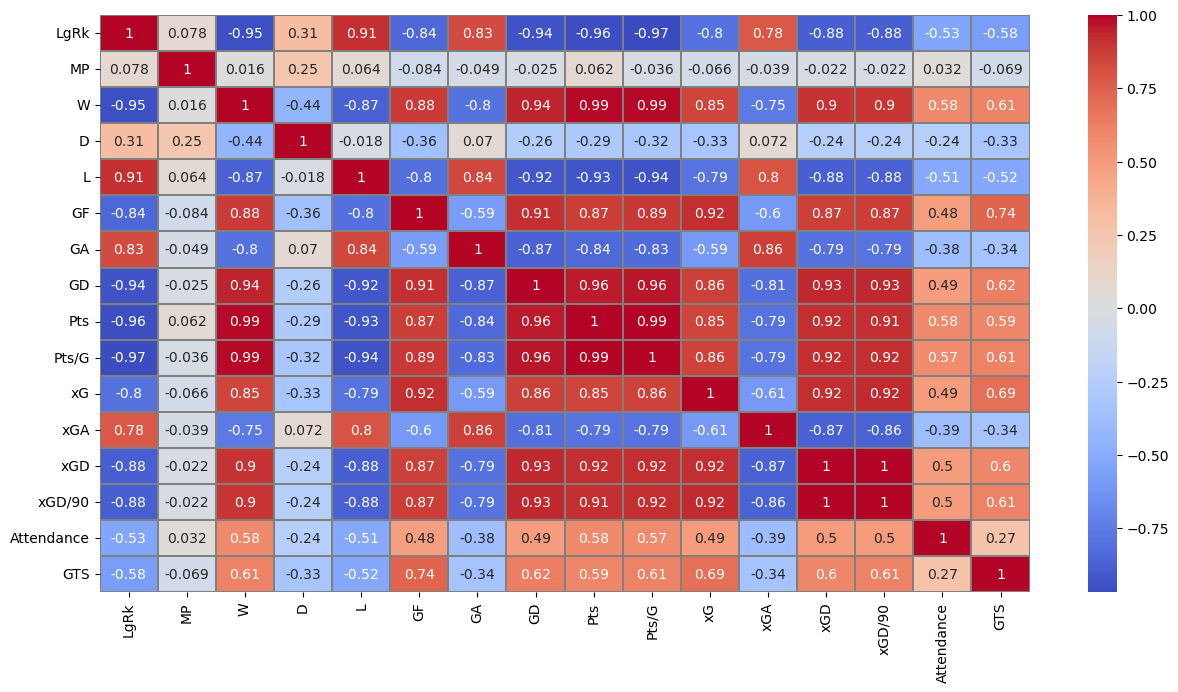

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7.5))  
sns.heatmap(UEFA.corr(), annot=True, cmap='coolwarm', linewidths=.3, linecolor='grey', ax=ax)
plt.show()

#### OBSERVACIONS

Primer de tot s'ha de tenir en compte el comentat abans, que alguns valors baixos en veritat te un valor positiu (Ranking, partits perduts,...) i alguns valor alts tenen un negatiu (Partits perduts, gols rebuts...).

Per això ens trobem amb vàries correlacions positives i negatius les quals haurem de saber valorar. El que està clar és que estant relacionades. Algunes d'elles esperades.

Una de les variables que volia veure la seva correlació és la d'assistència, ja que podia ser un factor determinant. La major correlació és de 0.58 (amb les victòries), que tot i que no està malament no afirmaria que és determinant.

Una de les correlacions que si destacaria és la relació de Gols a favor amb la de gols del màxim golejador de l'equip. Te un valor de quasi 75% de correlació. Per tant és bastant determinant els gols que faci "l'estrella" de cada equip.




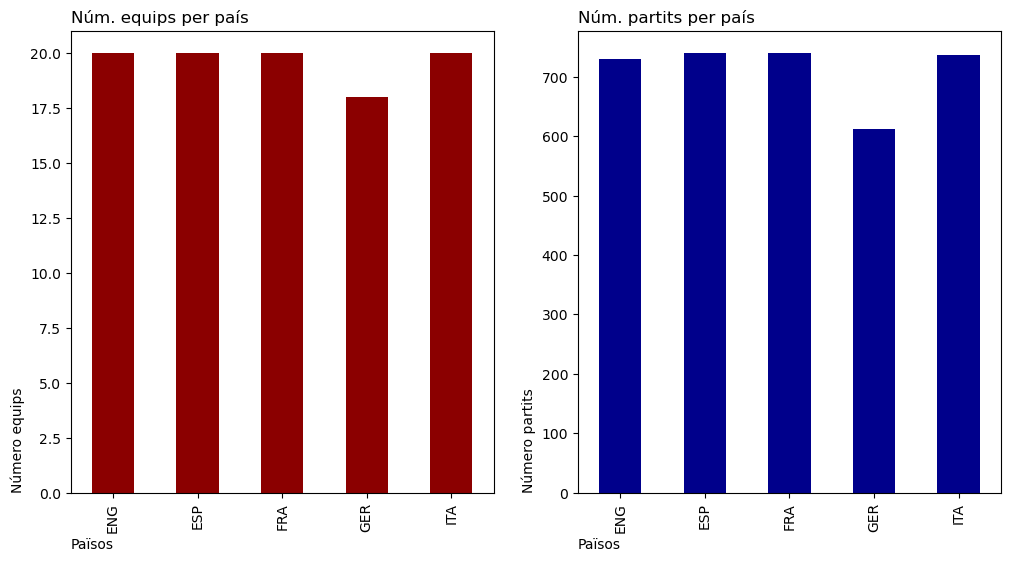

In [75]:
#Crear gràfics de barres
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
UEFA.groupby('Country')['Squad'].count().plot(kind='bar', color='Darkred', ax=ax1)
UEFA.groupby('Country')['MP'].sum().plot(kind='bar', color='Darkblue', ax=ax2)

#Índex
ax1.set_title('Núm. equips per país', loc = 'left')
ax1.set_xlabel('Països', loc = 'left')
ax1.set_ylabel('Número equips', loc = 'bottom')


ax2.set_title('Núm. partits per país', loc = 'left')
ax2.set_xlabel('Països', loc = 'left')
ax2.set_ylabel('Número partits', loc = 'bottom')

#Mostrar gràfiques
plt.show()

#### OBSERVACIONS

Veiem que hi ha quasi els mateixos equips en la classificació per equip, excepte Alemania que te 2 equips menys. Cosa que afectara a les dades si ho comparem. 

El mateix passa amb el nombre de partits, encara que veiem que a Anglaterra també han jugat algún partit menys respecte a Espanya, França i Italia.

### TEST D'HIPOTESI T-Test student (1 atribut = GF)

Escollo aquest test perquè vull observar com dos mostres independents d'un mateix atribut son iguals o no. 

**Enunciat**: Els gols de la lliga espanyola serà igual a la mitja de gols de la resta de paísos del dataframe UEFA.

 - **Hipotesis nula (H0):** La mitja dels gols a favor dels equips espanyols i la resta d'equips son iguals (pas 1)
 - **Hipotes alternativa (H1):** La mitja dels gols a favor dels equips espanyols i la resta d'equips no son iguals. (pas 2)
 - **Alfa =** 0.05 (pas 3)
 
**Calculem les dues mitjanes**

In [140]:
# Calculem la mitjana General (sense ESP perquè el test sigui independent)
UEFA_noESP = UEFA[UEFA['Country'] != 'ESP']
print('La mitja de gols dels paísos sense ESP és', UEFA_noESP['GF'].mean())

# Calculem la mitjana de gols d'ESP
UEFA_ESP = UEFA[UEFA['Country'] == 'ESP']
print('La mitja de gols a ESP és', UEFA_ESP['GF'].mean())

La mitja de gols dels paísos sense ESP és 52.0
La mitja de gols a ESP és 46.5


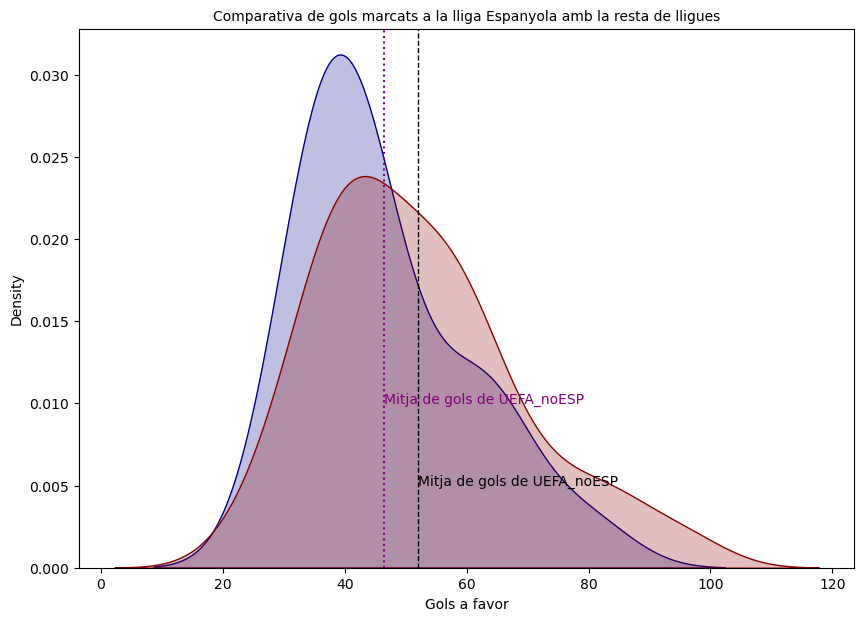

In [141]:
#Creem el gràfic per veure-ho més clarament
plt.figure(figsize= (10,7))
sns.kdeplot(UEFA_ESP['GF'], label= 'GF', color= 'darkblue', fill = True)
sns.kdeplot(UEFA_noESP['GF'], label= 'GF', color= 'darkred', fill = True)

#Marquem les línies de les dues mitjanas
plt.axvline(x= UEFA_noESP['GF'].mean(), linewidth = 1, color= 'black', ls= '--')
plt.axvline(x= UEFA_ESP['GF'].mean(), color = 'purple', ls = ':')
plt.text(x= 52, y=0.005, s= 'Mitja de gols de UEFA_noESP', color= 'black')
plt.text(x= 46.5, y = 0.010, s= 'Mitja de gols de UEFA_noESP', color= 'purple')

#Eixos i títol
plt.xlabel('Gols a favor', fontsize=10)
plt.title('Comparativa de gols marcats a la lliga Espanyola amb la resta de lligues', fontsize=10)

#Mostrem el gràfic
plt.show()

**Veiem que no es Gaussiana però fem el test pero comprovar-ho**

In [142]:
from scipy.stats import shapiro
data = UEFA['GF']
stat, p = shapiro(data)
print ('stat=%.3f, p=%.10f' % (stat, p))
if p > 0.05:
    print('Probablement Gaussiana')
else:
    print('Probablement no Gaussiana')

stat=0.943, p=0.0003564788
Probablement no Gaussiana


**Fem un T-Test stuedent (dos mostres independents) per rebutjar o no la hipotesis nula**

In [143]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(UEFA_noESP['GF'], UEFA_ESP['GF'])
print ('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement tenen la mateixa distribució')
else:
    print('Probablement tenen distribucióons diferents')
print('El P-value és', p.round(3))

stat=1.369, p=0.174
Probablement tenen la mateixa distribució
El P-value és 0.174


_Podem veure que el P value (0.174) > a alfa (0.05) per això diem que la distribució es problablement igual i, per tant **no podem rebutjar la hipotesis nula** de que les mitjes son iguals._

### Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

### TEST D'HIPOTESI Pearson correlatión Coefficient (2 atributs = GF i Pts)

Escollim aquest test perquè vull veure si existeix una relació lineal entre dos atributs independents. 

**Enunciat**: Si comparo els gols realitzats i els punts de cada equip veurem que existeix una relació monótona entre ells.

 - **Hipotesis nula (H0):** Els dos atributs son independents (pas 1)
 - **Hipotes alternativa (H1):** Existeix una dependencia entre els dos atributs. (pas 2)
 - **Alfa =** 0.05 (pas 3)
 

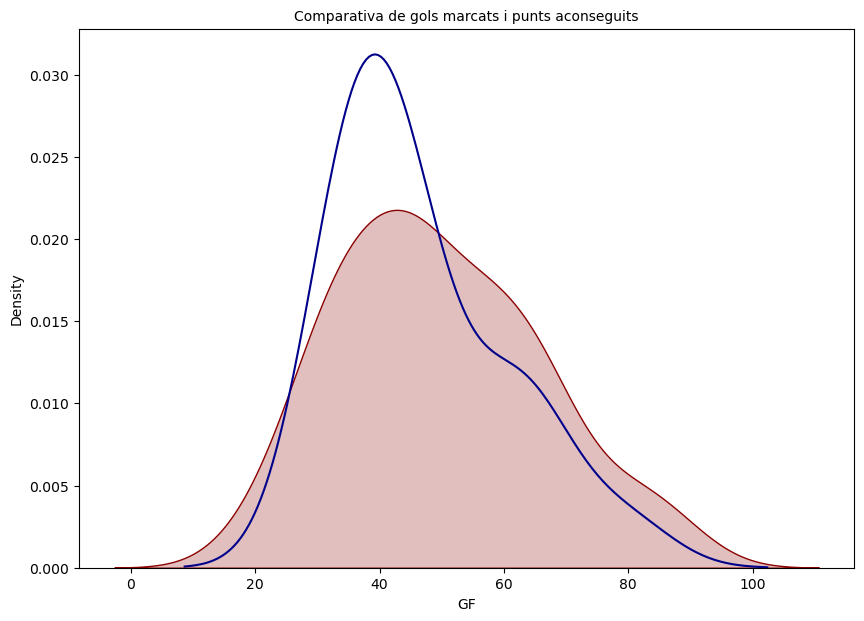

In [144]:
#Creem el gràfic per veure-ho més clarament
plt.figure(figsize= (10,7))
sns.kdeplot(UEFA_ESP['GF'], label= 'GF', color= 'darkblue', fill = False)
sns.kdeplot(UEFA_noESP['Pts'], label= 'GF', color= 'darkred', fill = True)

#Eixos i títol
plt.title('Comparativa de gols marcats i punts aconseguits', fontsize=10)

#Mostrem el gràfic
plt.show()

_Podem veure que les dos gràfiques tenen una forma i àrea similar encara que siguin uuna mica diferents_

In [145]:
from scipy.stats import pearsonr
stat, p = pearsonr(UEFA['GF'], UEFA['Attendance'])
print('stat=%.3f p=%.10f' % (stat,p))
if p > 5:
    print('Probablement independent')
else:
    print('Probablement son dependents')
print('El P-value és', p.round(10))

stat=0.483 p=0.0000004687
Probablement son dependents
El P-value és 4.687e-07


_Podem veure que el P value (0.000..) < a alfa (0.05) per això diem que existeix una relació entre les dos variables i, per tant **podem rebutjar la hipotesis nula** de que els atributs son independents._

### Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

### TEST D'HIPOTESI Kruskal-Wallis H Test (3 atributs =  W, Assitance i GTS)

He escollit aquest test ja que volem comparar la distribució dels valors de 3 atributs diferents i independents. 

**Enunciat**: Si la distribució entre aquestes tres variables (Victories, Assistència i Goals Top Scorer) es similar o no. 

 - **Hipotesis nula (H0):** La distribució de tots els atributs és igual (pas 1)
 - **Hipotes alternativa (H1):** La distribució d'un o més atributs son diferents. (pas 2)
 - **Alfa =** 0.05 (pas 3)
 

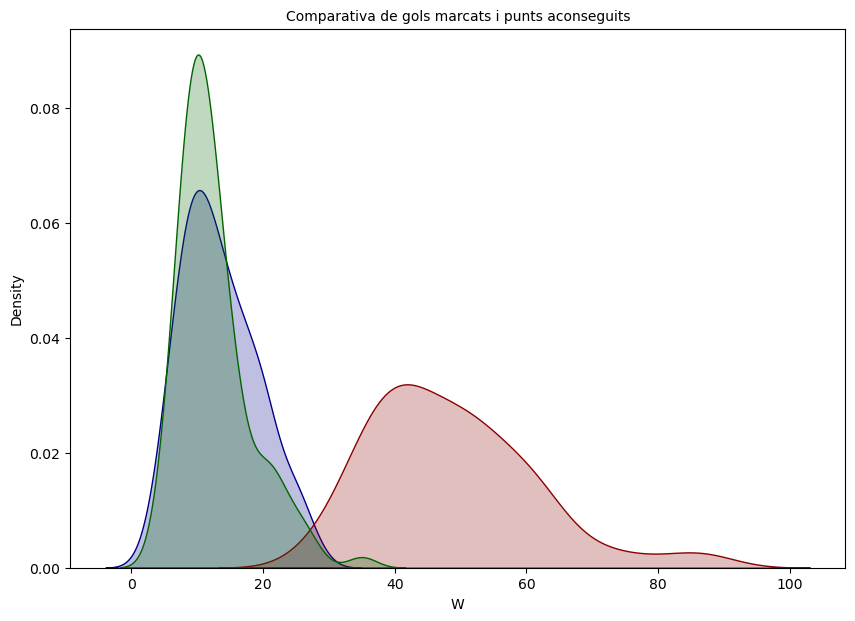

In [146]:
#Creem el gràfic per veure-ho més clarament
plt.figure(figsize= (10,7))
sns.kdeplot(UEFA['W'], label= 'W', color= 'darkblue', fill = True)
sns.kdeplot(UEFA['xG'], label= 'xG', color= 'darkred', fill = True)
sns.kdeplot(UEFA['GTS'], label= 'GTS', color= 'darkgreen', fill = True)

#Eixos i títol
plt.title('Comparativa de gols marcats i punts aconseguits', fontsize=10)

#Mostrem el gràfic
plt.show()

_Amb la gràfica ja podem observar que dos atributs si sembla que tenen una distribució similar però el tercer en qüestio (xG) no... Ho comprovarem amb el test d'hipotesi._

In [147]:
from scipy.stats import kruskal
stat, p = kruskal(UEFA['W'], UEFA['xG'], UEFA['GTS'])
print('stat=%.3f p=%.10f' % (stat,p))
if p > 5:
    print('Probablement tenen la mateixa distribució')
else:
    print('Probablement un o més dels atributs no ten la mateixa distribució')
print('El P-value és', p.round(10))

stat=195.868 p=0.0000000000
Probablement un o més dels atributs no ten la mateixa distribució
El P-value és 0.0


_Podem veure que el P value (0.000..) < a alfa (0.05) per això diem que alemnys un dels atributs no te una distribució igual que la resta i, per tant **podem rebutjar la hipotesis nula** de que tots els atributs tinguin la mateixa distribució._